In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plotting Configuration ---
# Setting aesthetic parameters for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

# --- Data Loading ---
try:
    # Loading the dataset
    df = pd.read_csv('SA_Aqar.csv')

    # Quick sanity check on data shape
    print(f"Dataset loaded successfully. Shape: {df.shape}")

except FileNotFoundError:
    print("Error: The file 'SA_Aqar.csv' was not found. Please check the path.")

# --- Initial Inspection ---
# Checking the first few rows to understand structure
display(df.head())

# Checking data types and null values
print("-" * 30)
df.info()

Dataset loaded successfully. Shape: (3718, 24)


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,1,1,0,0,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,1,1,0,0,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        371

,count,mean,std,min,25%,50%,75%,max
price,3718.0,87387.974180,70634.699893,1000.0,55000.0,70000.0,100000.0,1700000.0
size,3718.0,390.968531,1565.056135,1.0,280.0,330.0,400.0,95000.0
property_age,3718.0,5.064820,7.590427,0.0,0.0,2.0,7.0,36.0
bedrooms,3718.0,5.083916,1.230040,1.0,4.0,5.0,6.0,7.0
livingrooms,3718.0,2.243948,0.916436,1.0,2.0,2.0,3.0,5.0


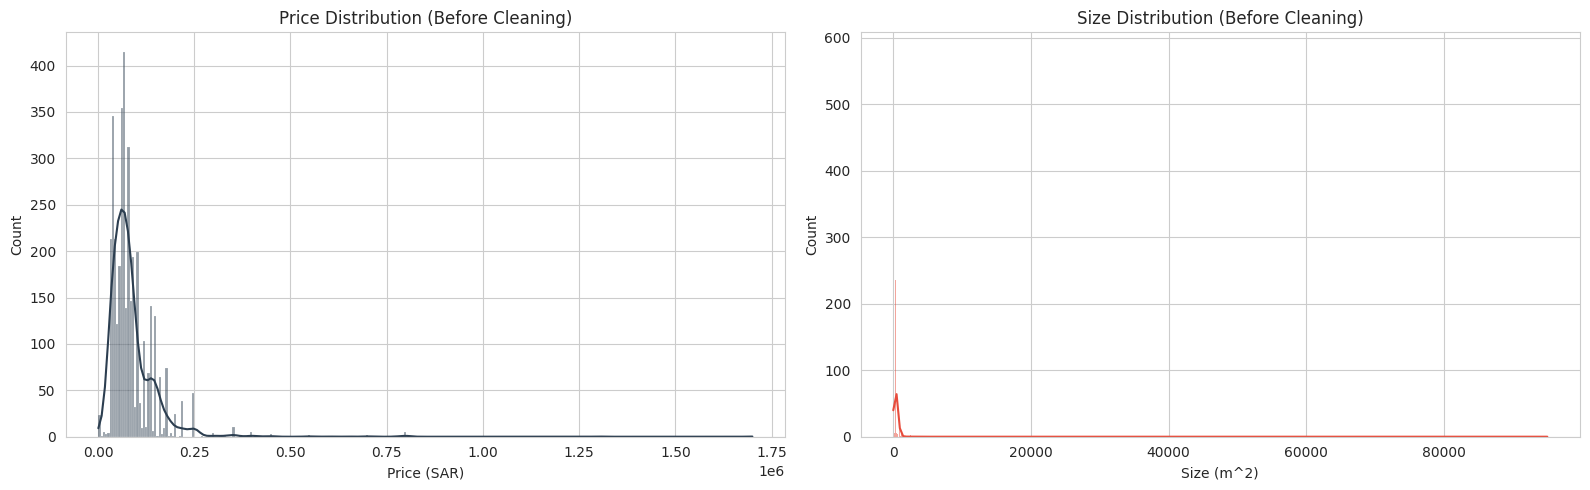

In [2]:
# --- Statistical Summary ---
# Using .T (Transpose) for better readability with many columns
# This helps us spot logical errors (e.g., min price = 1?)
display(df[['price', 'size', 'property_age', 'bedrooms', 'livingrooms']].describe().T)

# --- Visualizing Distributions (Outlier Detection) ---
# We need to check if Prices and Sizes follow a normal distribution or have skewness
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Price Distribution
sns.histplot(df['price'], kde=True, ax=axes[0], color='#2c3e50')
axes[0].set_title('Price Distribution (Before Cleaning)')
axes[0].set_xlabel('Price (SAR)')

# Plot 2: Size Distribution
sns.histplot(df['size'], kde=True, ax=axes[1], color='#e74c3c')
axes[1].set_title('Size Distribution (Before Cleaning)')
axes[1].set_xlabel('Size (m^2)')

plt.tight_layout()
plt.show()

Original Data Shape: (3718, 24)
Cleaned Data Shape:  (3689, 24)
Dropped Rows: 29


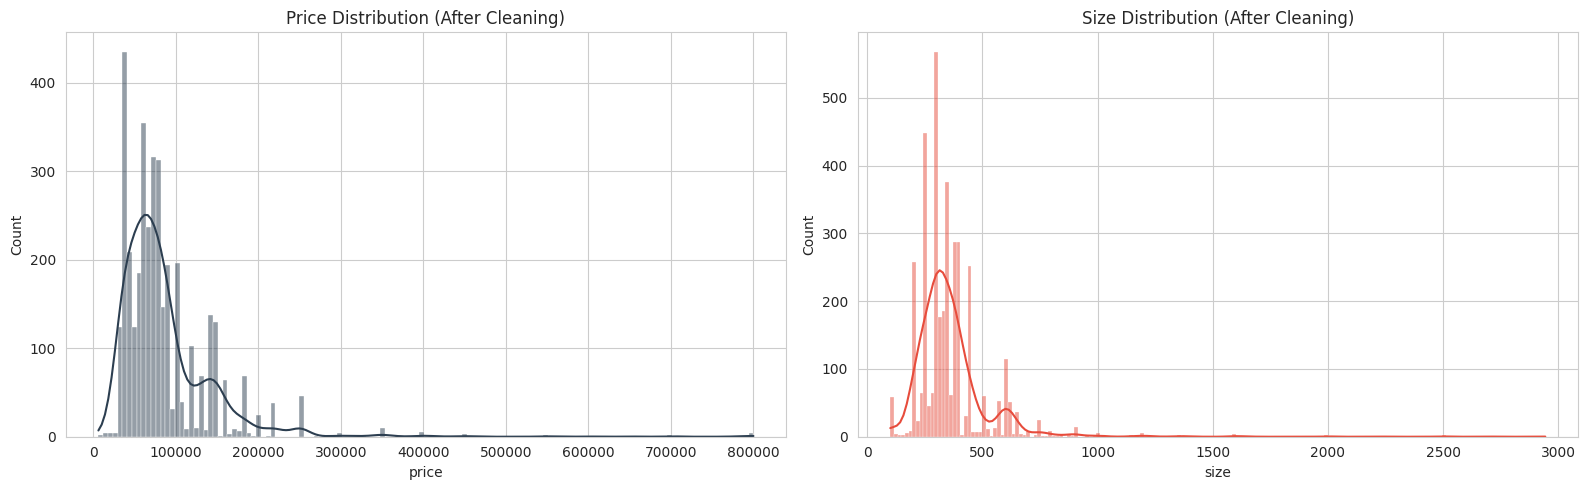

In [3]:
# --- Data Cleaning & Filtering ---

# 1. Define logical boundaries for Real Estate in Saudi Arabia
# Removing extreme outliers (e.g., size < 50m or size > 3000m)
valid_size = (df['size'] > 50) & (df['size'] < 3000)
valid_price = (df['price'] > 5000) & (df['price'] < 1000000) # Filtering logic based on rental market

# 2. Apply filters
df_clean = df[valid_size & valid_price].copy()

# 3. Check the impact of cleaning
print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape:  {df_clean.shape}")
print(f"Dropped Rows: {df.shape[0] - df_clean.shape[0]}")

# --- Re-Visualizing After Cleaning ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Price Distribution (Cleaned)
sns.histplot(df_clean['price'], kde=True, ax=axes[0], color='#2c3e50')
axes[0].set_title('Price Distribution (After Cleaning)')

# Size Distribution (Cleaned)
sns.histplot(df_clean['size'], kde=True, ax=axes[1], color='#e74c3c')
axes[1].set_title('Size Distribution (After Cleaning)')

plt.tight_layout()
plt.show()

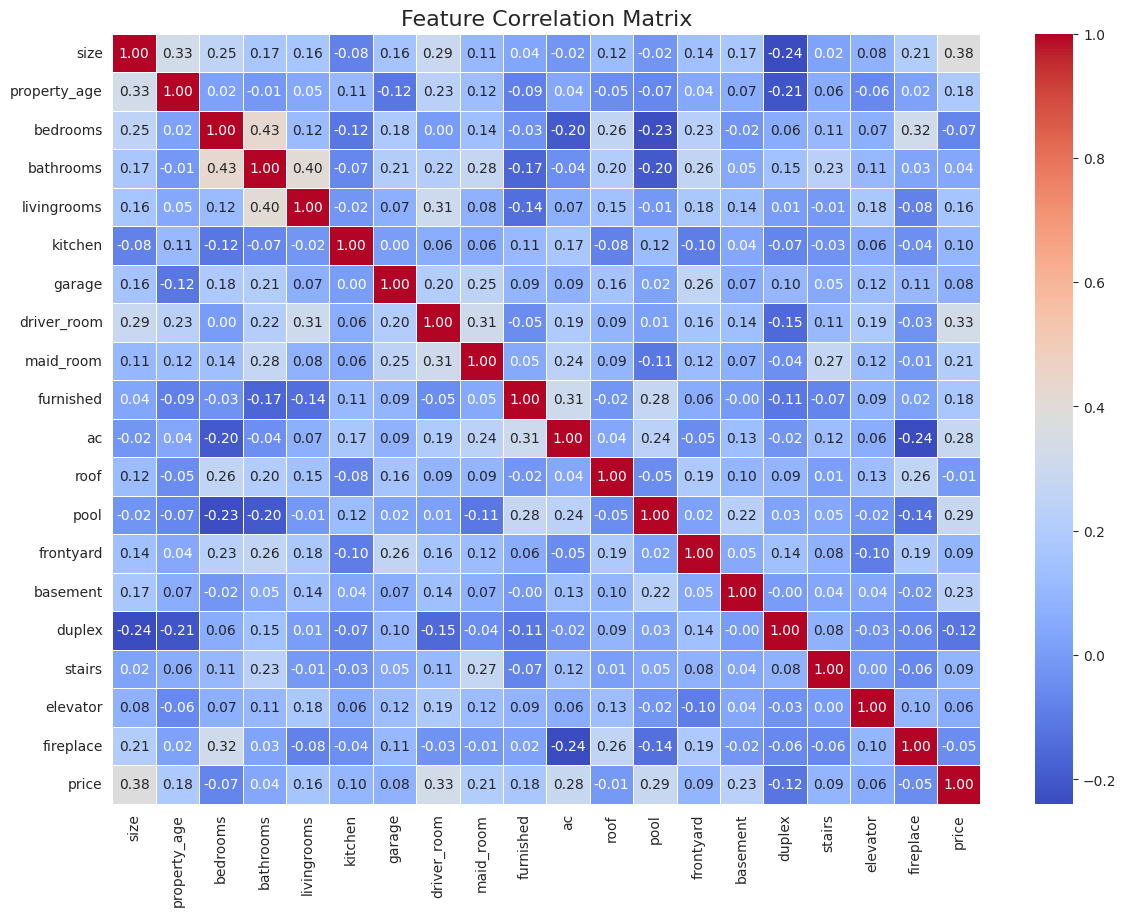

Top 5 Features affecting Price:
price          1.000000
size           0.384763
driver_room    0.327901
pool           0.285984
ac             0.284374
basement       0.234332
Name: price, dtype: float64


In [4]:
# --- Correlation Analysis ---

# 1. Filter only numeric columns for correlation calculation
numeric_cols = df_clean.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# 2. Setup the visualization
plt.figure(figsize=(14, 10))

# 3. Draw Heatmap
# annot=True: to show numbers inside squares
# cmap='coolwarm': standard professional color scheme (Blue to Red)
# fmt=".2f": formatting numbers to 2 decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# --- Zooming into Price Correlations ---
# Let's print specifically what affects the 'price' the most
print("Top 5 Features affecting Price:")
print(corr_matrix['price'].sort_values(ascending=False).head(6))

In [5]:
# --- Data Preprocessing (Preparing for AI) ---

# 1. Select relevant categorical features to encode
# We focus on 'city' and 'front' as they strongly influence price logic
categorical_cols = ['city', 'front']

# 2. Convert text to numbers using One-Hot Encoding (get_dummies)
# This creates new columns like 'city_Riyadh', 'front_North', etc.
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 3. Drop columns that are too complex for the baseline model
# 'district': Too many unique values (would create huge dimensionality)
# 'details': Unstructured text requiring NLP (out of scope for now)
df_final = df_encoded.drop(['district', 'details'], axis=1)

# 4. Define Features (X) and Target (y)
X = df_final.drop('price', axis=1)  # All columns except Price
y = df_final['price']               # The value we want to predict

# Check the new shape of data
print("Data is ready for Machine Learning!")
print(f"Features Shape: {X.shape}")
print(f"Target Shape:   {y.shape}")
display(X.head(3))

Data is ready for Machine Learning!
Features Shape: (3689, 31)
Target Shape:   (3689,)


,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,city_ الدمام,city_ الرياض,city_ جدة,front_4 شوارع,front_جنوب,front_جنوب شرقي,front_جنوب غربي,front_شرق,front_شمال,front_شمال شرقي,front_شمال غربي,front_غرب
0,250,0,5,5,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,False,True,False,False,False,False,False,False,True,False,False,False
1,370,0,4,5,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,False,True,False,False,True,False,False,False,False,False,False,False
2,380,0,4,5,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,False,True,False,False,True,False,False,False,False,False,False,False


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Data Preparation ---
# Converting True/False to 1/0 for cleaner processing
X = X.astype(int)

# Splitting data: 80% for training, 20% for testing
# random_state=42 is used to ensure reproducible results (standard practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---
print("Training the Random Forest Model... Please wait...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Prediction & Evaluation ---
# Making predictions on the test set (the data the model hasn't seen)
y_pred = model.predict(X_test)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print("🎯 Model Performance:")
print(f"R2 Score (Accuracy): {r2:.2f} (or {r2*100:.1f}%)")
print(f"MAE (Average Error): {mae:,.0f} SAR")
print("-" * 30)

# Comparing Actual vs Predicted for the first 5 houses
comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nSample Predictions:")
display(comparison.head(5))

Training the Random Forest Model... Please wait...
------------------------------
🎯 Model Performance:
R2 Score (Accuracy): 0.36 (or 35.7%)
MAE (Average Error): 15,724 SAR
------------------------------

Sample Predictions:


,Actual Price,Predicted Price
3586,140000,140000.0
3630,180000,180000.0
497,35000,85320.0
933,60000,111660.0
3001,75000,75000.0


In [7]:
# --- Advanced Feature Engineering ---

# 1. Handling 'district' (The missing piece of the puzzle)
# Strategy: Keep top 50 districts, label others as 'Other'
top_50_districts = df_clean['district'].value_counts().head(50).index
df_clean['district_processed'] = df_clean['district'].apply(lambda x: x if x in top_50_districts else 'Other')

# 2. Re-Encoding with District included
categorical_cols_v2 = ['city', 'front', 'district_processed']
df_encoded_v2 = pd.get_dummies(df_clean, columns=categorical_cols_v2, drop_first=True)

# 3. Drop unneeded columns
df_final_v2 = df_encoded_v2.drop(['district', 'details'], axis=1)

# 4. Split Data Again
X_v2 = df_final_v2.drop('price', axis=1)
y_v2 = df_final_v2['price']
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

# 5. Train the Model Again (Version 2)
print("Training Improved Model (with Districts)...")
model_v2 = RandomForestRegressor(n_estimators=150, random_state=42)
model_v2.fit(X_train_v2, y_train_v2)

# 6. Evaluate
y_pred_v2 = model_v2.predict(X_test_v2)
r2_v2 = r2_score(y_test_v2, y_pred_v2)
mae_v2 = mean_absolute_error(y_test_v2, y_pred_v2)

print("-" * 30)
print(f"🚀 New Accuracy (R2): {r2_v2:.2f} (or {r2_v2*100:.1f}%)")
print(f"📉 New Error (MAE): {mae_v2:,.0f} SAR")
print(f"Improvements: +{(r2_v2 - 0.36)*100:.1f}% Accuracy")
print("-" * 30)

Training Improved Model (with Districts)...
------------------------------
🚀 New Accuracy (R2): 0.42 (or 42.1%)
📉 New Error (MAE): 13,752 SAR
Improvements: +6.1% Accuracy
------------------------------


In [8]:
import joblib

# --- Saving the Model ---
# We save the trained model to a file so we can use it later in a Web App or API
filename = 'saudi_real_estate_model.pkl'
joblib.dump(model_v2, filename)

print(f"✅ Model saved successfully as '{filename}'")
print("You can now download this file and use it in any Python application!")

# --- Project Summary ---
print("\n📋 Project Report:")
print(f"1. Data Source: Saudi Aqar Dataset ({df.shape[0]} rows)")
print(f"2. Cleaning: Removed {df.shape[0] - df_clean.shape[0]} outliers")
print(f"3. Best Model: Random Forest Regressor")
print(f"4. Final Accuracy: {r2_v2*100:.1f}%")
print(f"5. Margin of Error: +/- {mae_v2:,.0f} SAR")

✅ Model saved successfully as 'saudi_real_estate_model.pkl'
You can now download this file and use it in any Python application!

📋 Project Report:
1. Data Source: Saudi Aqar Dataset (3718 rows)
2. Cleaning: Removed 29 outliers
3. Best Model: Random Forest Regressor
4. Final Accuracy: 42.1%
5. Margin of Error: +/- 13,752 SAR
